In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


In [7]:
df = pd.read_csv("CSV/full_dataset2.csv")
df.head()

,Unnamed: 0,Country,Total_Spent,Imm_SV,Life Exp SV,Infant SV,Doctor Density SV
0,0,Australia,5627.315,0.847195,0.961310,0.000000,0.489286
1,1,Austria,5882.745,0.857283,0.919643,0.000000,0.627381
2,2,Belgium,5406.979,0.942585,0.913690,0.008850,0.721429
3,3,Canada,5828.324,0.802411,0.937500,0.017699,0.288095
4,4,Denmark,5693.651,0.859252,0.910714,0.035398,0.500000


In [14]:
def total_factor(row, df, imm, life_exp, infant, d_d):

    imm_sv = row["Imm_SV"] * imm
    life_exp_sv = row["Life Exp SV"] * life_exp
    infant_sv = row["Infant SV"] * infant
    d_d_sv = row["Doctor Density SV"] * d_d

    sum = imm_sv + life_exp_sv + infant_sv + d_d_sv

    return sum


In [15]:

df["Total_SV"] = df.apply(lambda x: total_factor(x, df, 0.3, 0.5, 0.1, 0.1), axis=1)

df.head()


,Unnamed: 0,Country,Total_Spent,Imm_SV,Life Exp SV,Infant SV,Doctor Density SV,Total_SV
0,0,Australia,5627.315,0.847195,0.961310,0.000000,0.489286,0.783742
1,1,Austria,5882.745,0.857283,0.919643,0.000000,0.627381,0.779745
2,2,Belgium,5406.979,0.942585,0.913690,0.008850,0.721429,0.812649
3,3,Canada,5828.324,0.802411,0.937500,0.017699,0.288095,0.740053
4,4,Denmark,5693.651,0.859252,0.910714,0.035398,0.500000,0.766673


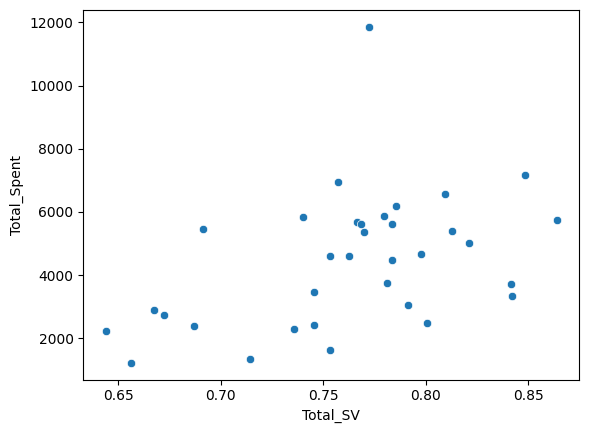

In [16]:
sns.scatterplot(data = df, x = "Total_SV", y = "Total_Spent")
plt.show()

In [21]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

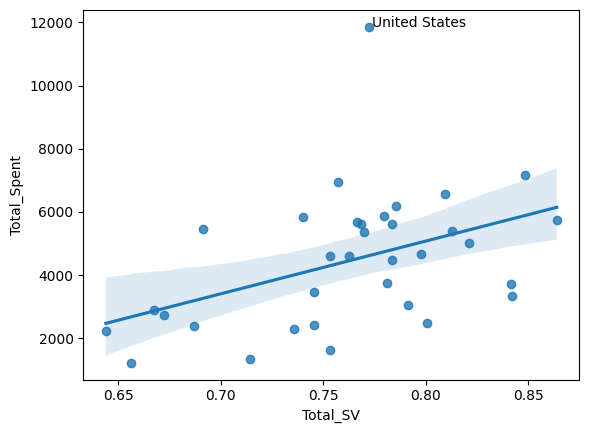

In [29]:
sns.regplot(x="Total_SV", y="Total_Spent", data=df)

for i, country in enumerate (df["Country"]):
    if (country == "United States") :
        plt.text(df["Total_SV"][i]+0.01, df["Total_Spent"][i]+0.01, country)

plt.show()